# Theory
- Decision trees tries to split my data to groups based on variation 
- Decision trees works with regression and classification   
- Root of a decision tree should be the feature that has the HIGHEST VARIATION
- Aggregation is done based on a certain feature and then I split the data based on this feature. For example: 
    I aggregate the "gender" feature w.r.t target
- Aggregation is done ONE FEATURE AT A TIME 
- If a target's  variation isnt really decreased after aggregating a feature X, then drop feature X, this means that the relationship between the feature and the target is nearly nonexistent and error value will be high 
- sklearn's ML decision tree model, onl takes numerical features. All categorical featujres must be encoded 
- For numerical data: In a DT ML model,I work out thresholds for each feature to split based on. This threshold should variation in target as much as possible. We ddont drop the feature in numerical data handling as variation still exists in the column and I wan  ccreate a new level using a new threshold for the same featyre 
- Decision tree structures , a.k.a  "decisiion node": 
    - Root node 
    - Interior node 
    - Leaf node
    - branch 
    - rule( complete path bein rule w leaf node)
- We dont necesseraly need to normalize data in a DT model, we just split based on variation 

In [2]:
import pandas as pd 
df = pd.read_csv("data2.csv")
df

,Celisus,Outlook,Temp,Humidity,Windy,Hours_Played
0,1,Rainy,Hot,High,False,25
1,4,Rainy,Hot,High,True,30
2,4,Overcast,Hot,High,False,46
3,10,Sunny,Mild,High,False,45
4,20,Sunny,Cool,Normal,False,52
5,22,Sunny,Cool,Normal,True,23
6,37,Overcast,Cool,Normal,True,43
7,24,Rainy,Mild,High,False,35
8,7,Rainy,Cool,Normal,False,38
9,25,Sunny,Mild,Normal,False,46


In [3]:
cols_to_encode = "Outlook Temp Humidity Windy".split()
X = df.iloc[: , :-1]
y = df.iloc[: , -1:]

In [4]:
#I can pass an integer non categorical column to the encoder mo problem BUT it must be sorted for it to be ignored by the encoder 
from category_encoders import OrdinalEncoder
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
X

,Celisus,Outlook,Temp,Humidity,Windy
0,1,1,1,1,False
1,4,1,1,1,True
2,4,2,1,1,False
3,10,3,2,1,False
4,20,3,3,2,False
5,22,3,3,2,True
6,37,2,3,2,True
7,24,1,2,1,False
8,7,1,3,2,False
9,25,3,2,2,False


In [5]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X,y)

DecisionTreeRegressor()

In [6]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X)

In [7]:
mean_absolute_error(y, y_pred)

0.0

In [8]:
#This is bec training data is testing data^ , mean abs error cant really be 0

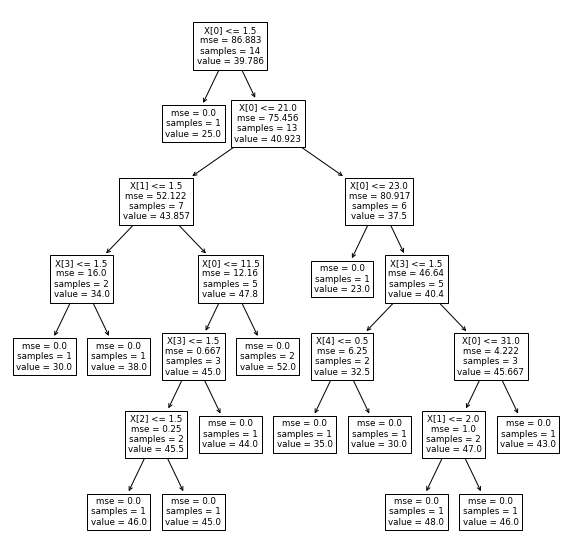

In [9]:
import matplotlib.pyplot as plt 
from sklearn import tree 
plt.figure(figsize = (10,10))
tree.plot_tree(model)
pass

### Root node explanation^
1. X[0] -> first feature
2. mse -> variation of target w.r.t aggregation of this feature X[0]</>1.5
3. Samples -> #of features 
4. value -> average el target for this node

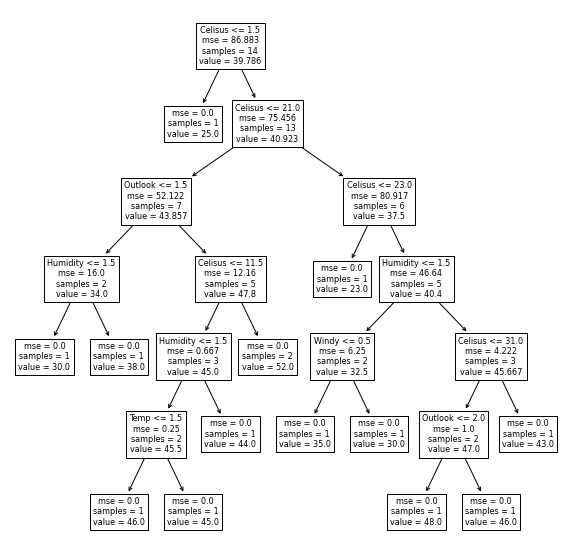

In [10]:
import matplotlib.pyplot as plt 
from sklearn import tree 
plt.figure(figsize = (10,10))
tree.plot_tree(model)
tree.plot_tree(model , feature_names= X.columns.to_list())
pass

In [ ]:
s